In [3]:
#============================ Loading required libraries ============================#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [4]:
#============================ Loading the dataset ============================#

# Change the path of dataset
df = pd.read_csv('heart_disease_uci.csv')
df = df.rename(columns={'num': 'disease_present'}) # Renaming target column
df = df.drop(['id', 'dataset'], axis=1) # Dropping useless columns

# Mapping values 1,2,3,4 to 1 (disease is present)
# 0 represents that disease is absent
df['disease_present'] = df.disease_present.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,disease_present
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


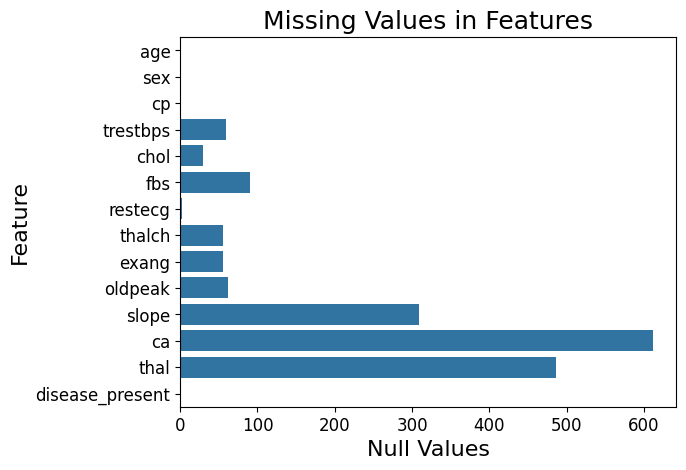

In [5]:
#============================ Missing Value Treatment ============================#

# Counting null values in each feature
df_null = pd.DataFrame(df.isnull().sum().reset_index())
df_null.columns = ['feature', 'null_values']
df_null

# Barchart for null values
sns.barplot(y=df_null['feature'], x=df_null['null_values'], orient='h')
plt.title('Missing Values in Features', fontsize=18)
plt.xlabel('Null Values', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [6]:
# For Categorical features, replacing null values using backfill method
df = df.sample(frac = 1, random_state=0)
df['restecg'].fillna(method='bfill', inplace=True)
df['fbs'].fillna(method='bfill', inplace=True)
df['exang'].fillna(method='bfill', inplace=True)
df['slope'].fillna(method='bfill', inplace=True)
df['thal'].fillna(method='bfill', inplace=True)
df.isnull().sum()

/tmp/ipython-input-1767178070.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['restecg'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-1767178070.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['restecg'].fillna(method='bfill', inplace=True)
/tmp/ipython-input-1767178070.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavio

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,0
restecg,0
thalch,55
exang,0
oldpeak,62


In [7]:
# For Numerical features, replacing null values with mean of the feature
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['trestbps'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


#Visualizations #

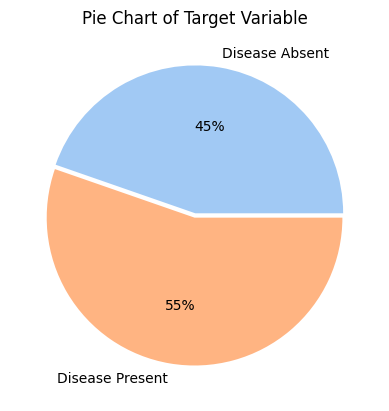

In [8]:
# Pie-chart of Target feature - disease_present

unique_values = df['disease_present'].unique()
counts = df['disease_present'].value_counts().sort_values()
percentages = counts / counts.sum() * 100
plt.pie(percentages, labels=['Disease Absent', 'Disease Present'],
        colors= seaborn.color_palette('pastel'), explode=[0.02,0.01], autopct='%.0f%%')
plt.title('Pie Chart of Target Variable')
plt.show()

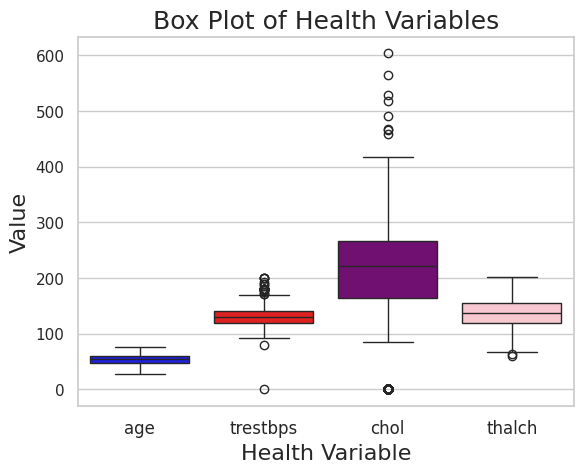

In [9]:
#============================ Box Plot of Health Variables ============================#

# Select variables for box plots
health_variables = ['age', 'trestbps', 'chol', 'thalch']

# Define colors for each variable
colors = ['blue', 'red', 'purple', 'pink']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a box plot using Seaborn
#plt.figure(figsize=(15, 10))
ax = sns.boxplot(data=df[health_variables], palette=colors)

# Set x-axis ticks and labels with rotation
ax.set_xticks(range(len(health_variables)))
ax.set_xticklabels(health_variables, fontsize=12)

# Set labels and title
ax.set_xlabel('Health Variable', fontsize=16)
ax.set_ylabel('Value', fontsize=16)
ax.set_title('Box Plot of Health Variables', fontsize=18)

plt.show()

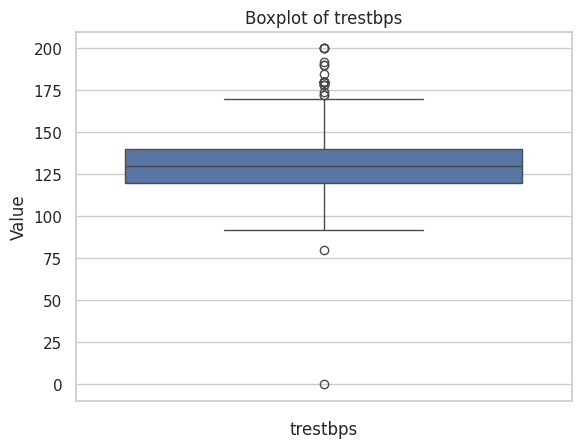

In [10]:
# Boxplot for any numerical feature
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'thalch']
feature = 'trestbps'
sns.boxplot( y=df[feature] );
plt.xlabel(feature)
plt.ylabel('Value')
plt.title('Boxplot of {}'.format(feature))
plt.show()

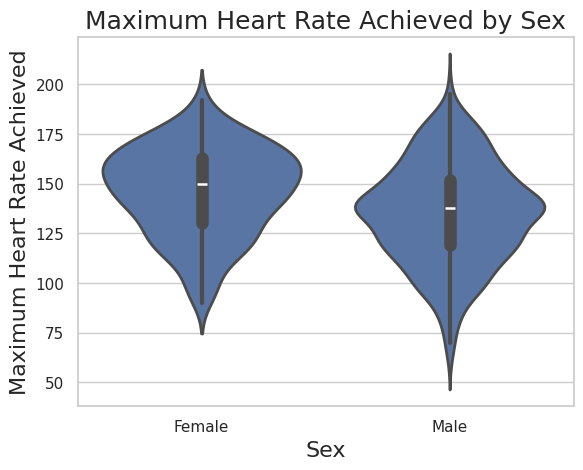

In [11]:
# Violin Plot of Maximum Heart Rate Achieved
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

ax = seaborn.violinplot(x=df["sex"], y=df["thalch"], linewidth = 2)

ax.set_xlabel('Sex', fontsize=16)
ax.set_ylabel('Maximum Heart Rate Achieved', fontsize=16)
ax.set_title('Maximum Heart Rate Achieved by Sex', fontsize=18)

plt.show()

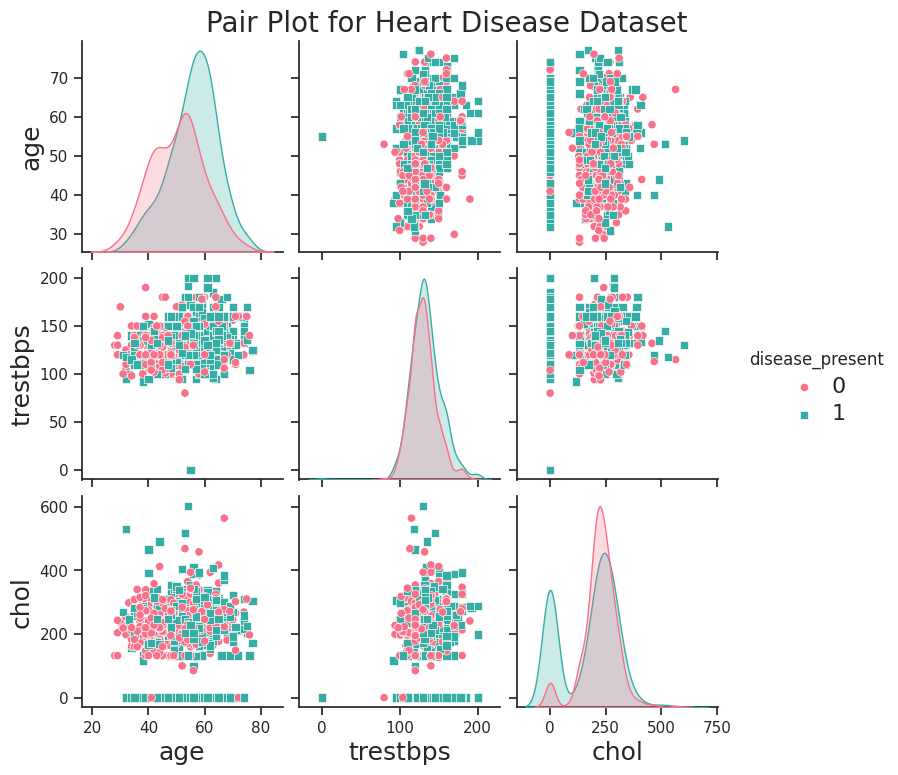

In [12]:
#============================ Pair Plot ============================#

# Select specific columns
selected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'disease_present']

# Create a copy of the subset
df_subset = df[selected_columns].copy()

# Convert categorical variables to appropriate data types
df_subset['sex'] = df_subset['sex'].astype('category')
df_subset['cp'] = df_subset['cp'].astype('category')
df_subset['disease_present'] = df_subset['disease_present'].astype('category')

# Create a pair plot for multivariate EDA
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df_subset, hue='disease_present', palette='husl', markers=["o", "s"])

# Add a title to the pair plot
pair_plot.fig.suptitle("Pair Plot for Heart Disease Dataset", y=1.02, fontsize=20)

legend = pair_plot._legend
for text in legend.get_texts():
    text.set_fontsize(16)

# Loop through each subplot to set x and y labels
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)  # Increase x-axis label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)  # Increase y-axis label font size

# Show the plot
plt.show()

In [13]:
#============================ Data Transformation for Modeling ============================#

# Label Encoding for categorical features
label_encoder = LabelEncoder()
df['cp'] = label_encoder.fit_transform(df['cp'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['thal'] = label_encoder.fit_transform(df['thal'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])

df['sex']=df['sex'].replace(('Male','Female'),(1,0))
df

/tmp/ipython-input-2472350372.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']=df['sex'].replace(('Male','Female'),(1,0))


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,disease_present
306,30,0,3,170.000000,237.0,0,2,170.000000,0,0.000000,2,0.676375,0,0
711,68,1,0,135.000000,0.0,0,2,120.000000,1,0.000000,2,0.676375,2,1
298,45,1,3,110.000000,264.0,0,1,132.000000,0,1.200000,1,0.000000,2,1
466,55,1,2,120.000000,220.0,0,0,134.000000,0,0.000000,2,0.676375,1,0
253,51,0,2,120.000000,295.0,0,0,157.000000,0,0.600000,2,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,64,1,0,132.132404,306.0,1,2,137.545665,1,0.878788,1,0.676375,2,1
192,43,1,0,132.000000,247.0,1,0,143.000000,1,0.100000,1,0.676375,2,1
629,51,1,0,130.000000,0.0,1,1,170.000000,0,-0.700000,2,0.676375,2,1
559,47,0,2,135.000000,248.0,1,1,170.000000,0,0.000000,1,0.676375,2,1


In [14]:
df.to_csv('final_data.csv', index = False)

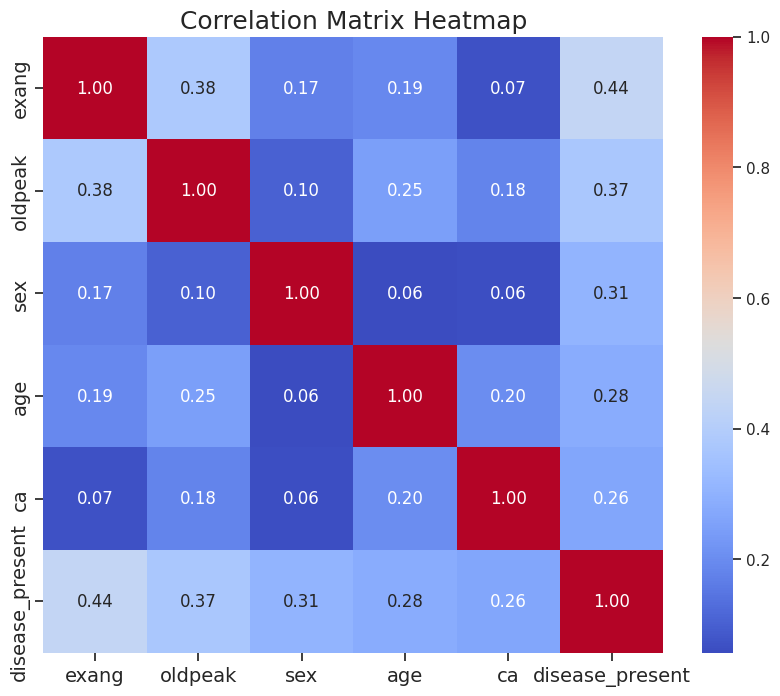

In [15]:
#============================ Correlation Matrix Heatmap ============================#
features_analysis=['exang', 'oldpeak', 'sex', 'age', 'ca', 'disease_present']
# features_analysis=['age', 'sex', 'trestbps', 'oldpeak', 'disease_present']
# features_analysis = df.columns
for i in features_analysis:
    df[i] = pd.to_numeric(df[i], errors='coerce')

subset_data = df[features_analysis]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Classification Models

#Scaling the data using standard scaler

In [16]:
df = pd.read_csv('final_data.csv')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Support Vector Machine (SVM)


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        73
           1       0.84      0.83      0.84       111

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

Metrics for Test Set:
Accuracy: 0.8043478260869565


Text(91.25, 0.5, 'Predicted')

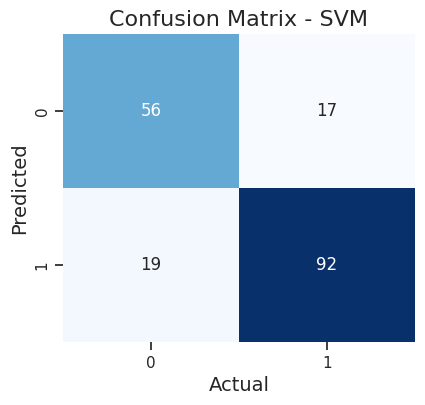

In [17]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print('Metrics for Test Set:')
print('Accuracy: {}'.format((cm_test[0][0] + cm_test[1][1]) / len(y_test)))

# Plot Confusion Matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM', fontsize = 16)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)

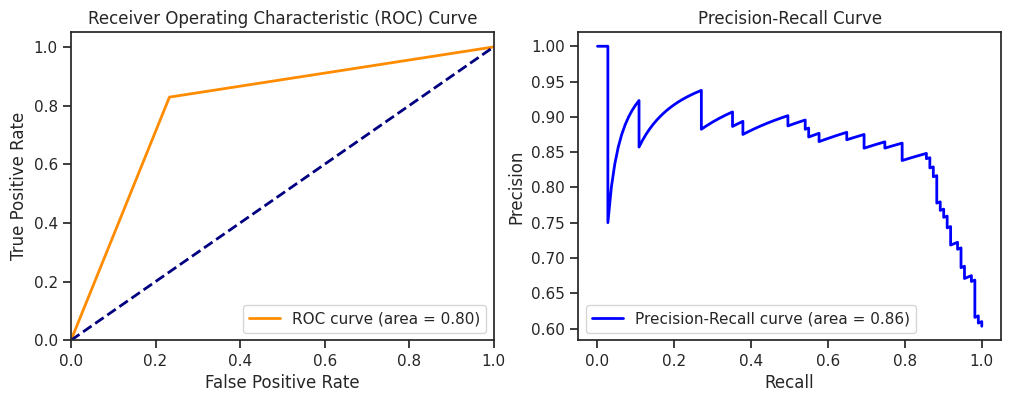

In [18]:
# ROC Curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Precision-Recall Curve of test set
precision, recall, thresholds = precision_recall_curve(y_test, classifier.decision_function(X_test))
area_under_curve = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(area_under_curve))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#Logistic Regression

Accuracy for test set for Logistic Regression = 77.72%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73        73
           1       0.84      0.78      0.81       111

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.78      0.78       184



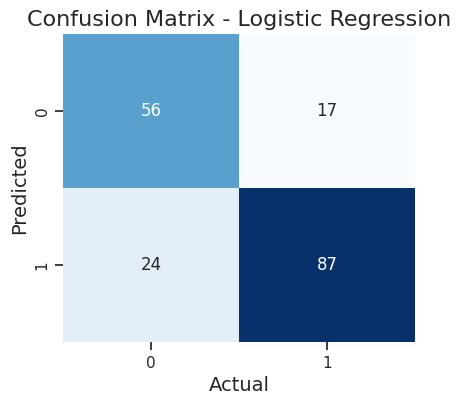

In [19]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# predictions(Test Set)
y_pred = classifier.predict(X_test)

# confusion matrix(Test Set)
cm_test = confusion_matrix(y_test, y_pred)

# predictions(Training Set)
y_pred_train = classifier.predict(X_train)

# confusion matrix(Training Set)
cm_train = confusion_matrix(y_pred_train, y_train)

# print the accuracy
#print('Accuracy for training set for Logistic Regression = {:.2%}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {:.2%}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix visualization
#plt.figure(figsize=(12, 4))
#plt.subplot(1, 2, 1)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Logistic Regression', fontsize = 16)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)

# cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)

#XGBoost

Accuracy for test set for XGBoost = 0.782608695652174

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        73
           1       0.84      0.78      0.81       111

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184



Text(91.25, 0.5, 'Predicted')

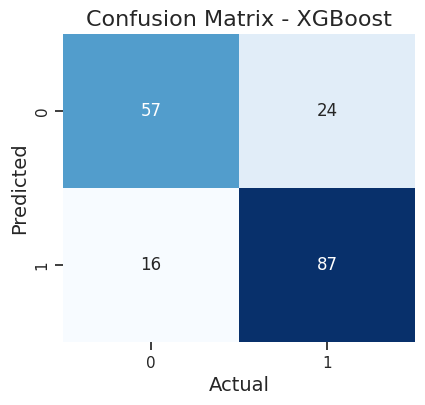

In [20]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)
#print("confusion matrix for test set", cm_test)
TP = cm_test[1, 1]  # True Positives
FP = cm_test[0, 1]  # False Positives
TN = cm_test[0, 0]  # True Negatives
FN = cm_test[1, 0]  # False Negatives

precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Accuracy for test set for XGBoost =", (TN + TP)/len(y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0
        # Confusion Matrix Plot for Test & Training set
# Plot Confusion Matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize = 16)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)

#Visualizations comparing Classification Models

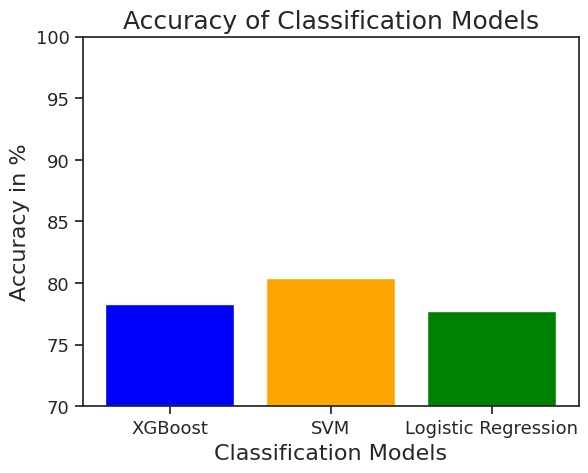

In [21]:
# Bar plot to compare accuracy of classifiers

# Accuracy scores of three models
models = ['XGBoost', 'SVM', 'Logistic Regression']
accuracy = [78.26, 80.43, 77.71]  # Replace these values with your accuracy scores

# Create bar chart
#plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.xlabel('Classification Models', fontsize=16)
plt.ylabel('Accuracy in %', fontsize=16)
plt.title('Accuracy of Classification Models', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show the plot
plt.ylim(70, 100)  # Set the y-axis limits
plt.show()


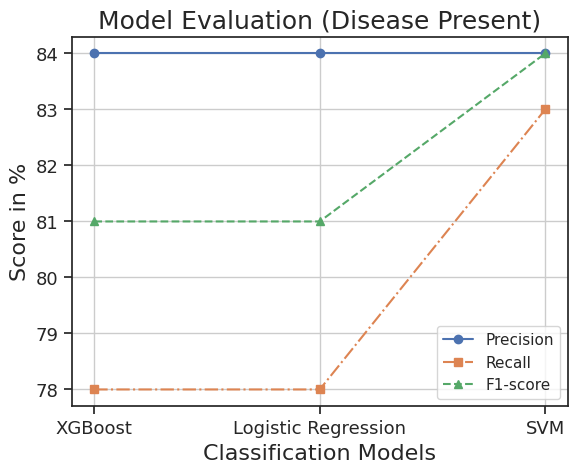

In [22]:
# Line chart to compare precision, recall and f1-score of classifiers (Class 1, Disease present)

# Precision, recall, and F1-scores of three models
models = ['XGBoost', 'Logistic Regression', 'SVM']
precision = [84, 84, 84]
recall = [78, 78, 83]
f1_scores = [81, 81, 84]

# Create line chart for precision
#plt.figure(figsize=(8, 6))
plt.plot(models, precision, marker='o', label='Precision', linestyle='-')

# Add line chart for recall
plt.plot(models, recall, marker='s', label='Recall', linestyle='-.')

# Add line chart for F1-score
plt.plot(models, f1_scores, marker='^', label='F1-score', linestyle='--')

# Adding labels and title
plt.xlabel('Classification Models', fontsize=16)
plt.ylabel('Score in %', fontsize=16)
plt.title('Model Evaluation (Disease Present)', fontsize=18)
plt.legend()  # Show legend
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show the plot
#plt.ylim(0, 1)  # Set the y-axis limits
plt.grid(True)  # Add gridlines
plt.show()


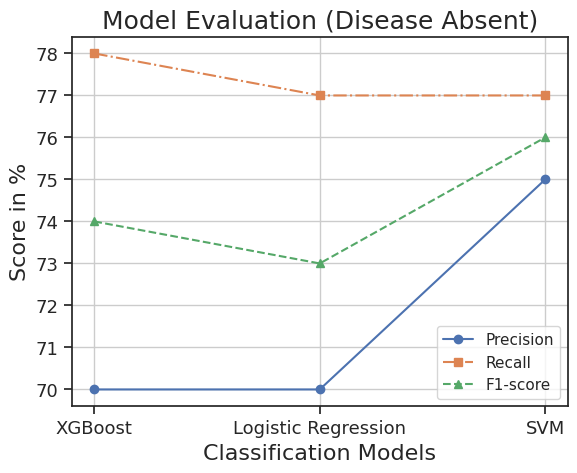

In [23]:
# Line chart to compare precision, recall and f1-score of classifiers (Class 0, Disease absent)

# Precision, recall, and F1-scores of three models
models = ['XGBoost', 'Logistic Regression', 'SVM']
precision = [70, 70, 75]
recall = [78, 77, 77]
f1_scores = [74, 73, 76]

# Create line chart for precision
#plt.figure(figsize=(8, 6))
plt.plot(models, precision, marker='o', label='Precision', linestyle='-')

# Add line chart for recall
plt.plot(models, recall, marker='s', label='Recall', linestyle='-.')

# Add line chart for F1-score
plt.plot(models, f1_scores, marker='^', label='F1-score', linestyle='--')

# Adding labels and title
plt.xlabel('Classification Models', fontsize=16)
plt.ylabel('Score in %', fontsize=16)
plt.title('Model Evaluation (Disease Absent)', fontsize=18)
plt.legend()  # Show legend
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Show the plot
#plt.ylim(0, 1)  # Set the y-axis limits
plt.grid(True)  # Add gridlines
plt.show()
